### This file was used for testing/figuring out functions, etc. 
### Not necessarily important, but may be worthwhile for seeing how certain functions work

In [15]:
import qiskit
display(qiskit.__version__)
from qiskit import *
from qiskit.transpiler.passes.optimization.template_matching import TemplateMatching, MaximalMatches

from qiskit.converters import circuit_to_dagdependency, dagdependency_to_circuit, dagdependency_to_dag
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
from qiskit.dagcircuit.dagdependency import DAGDependency
from qiskit.dagcircuit.dagcircuit import DAGCircuit

from library_template_substitution import LibraryTemplateSubstitution

from qiskit.quantum_info import Operator

from generate_circuits import generate_ccx_circuits, generate_non_ccx_circuits, load_templates, generate3QubitLayers

from commuting_layer_optimization import is_equivalent

from run_tests import *

from generate_random_circ import *

from three_layer_optimization_test import ThreeLayerOptimization

from run_tests import quantum_cost

from qiskit_ibm_runtime import QiskitRuntimeService

from custom_optimization_pass import get_custom_pass


'0.45.1'

In [16]:
circuits = generate_ccx_circuits()
layers = generate3QubitLayers()
templates = load_templates()

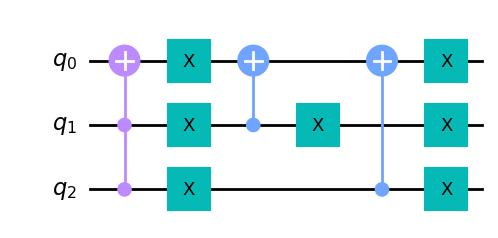

In [17]:
circuits[19].draw('mpl')

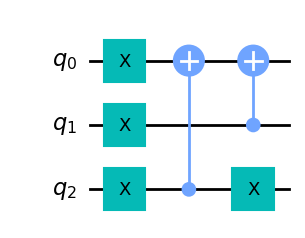

In [18]:
qreg_q = QuantumRegister(3, 'q')

template = QuantumCircuit(qreg_q)
template.x(qreg_q[0])
template.x(qreg_q[1])
template.x(qreg_q[2])
template.cx(qreg_q[2], qreg_q[0])
template.cx(qreg_q[1], qreg_q[0])
template.x(qreg_q[2])
template.draw('mpl')

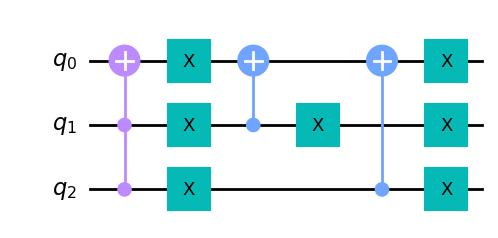

In [19]:
c = circuits[19]
c2 = transpile(c, optimization_level=2)
c.draw('mpl')

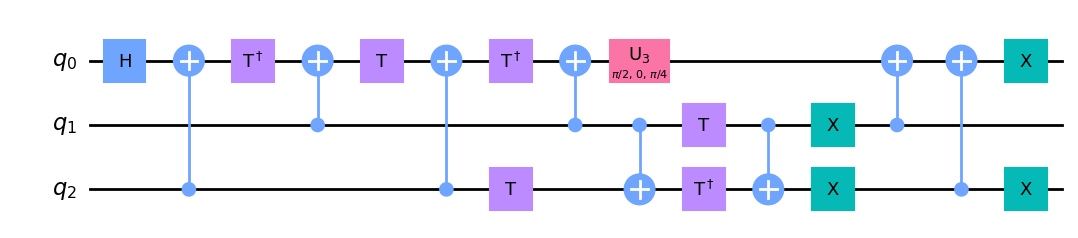

In [20]:
c = circuits[19]
c2 = transpile(c, optimization_level=3)
c2.draw('mpl')

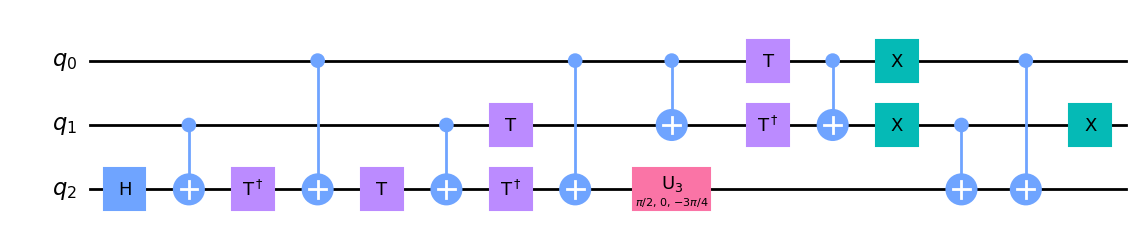

In [21]:
p = get_custom_pass()
c1 = QuantumCircuit(3)
c1.ccx(0 ,1, 2)

templates = load_templates()

c2 = c1 & templates[7][0]

c2 = p.run(c2)

c2.draw('mpl')

In [22]:
c1 = QuantumCircuit(3)
c1.ccx(0 ,1, 2)
c3 = c1 & templates[6][0]

c3 = p.run(c3)

c3.draw('mpl')

is_equivalent(c2, c3)

False

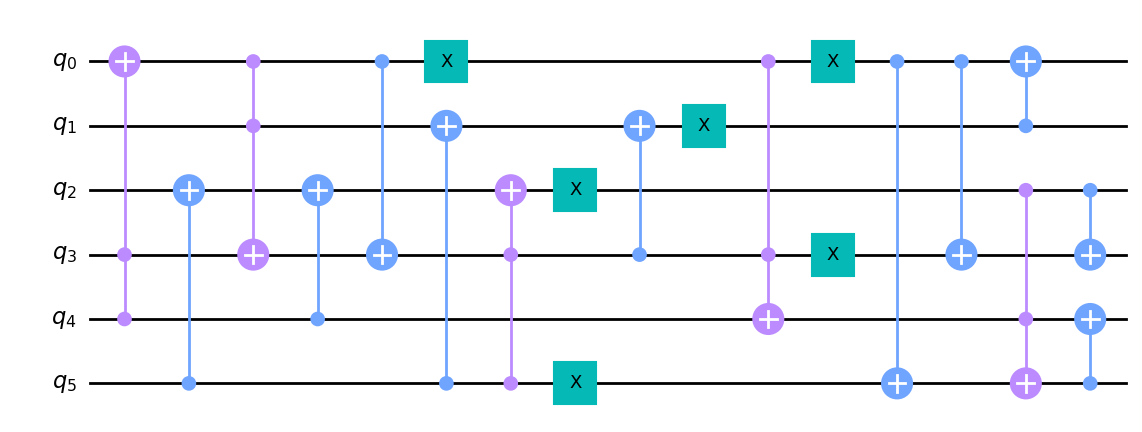

In [23]:
circ = generate_random_circuit(6, 10)
circ.draw('mpl')

In [24]:
_pass = ThreeLayerOptimization()
_pass.run_dag_opt(circuit_to_dag(circ))
circ_opt_1 = dag_to_circuit(_pass.dag_optimized)
l3 = transpile(circ, optimization_level=3)
print(quantum_cost(circ_opt_1))
print(quantum_cost(l3))
print(quantum_cost(circ))

127
130
131


In [25]:
print(_pass.template_matching_time)
print(_pass.template_substitution_time)
print(_pass.optimization_pass_time)

7.367246866226196
0
0.02371382713317871


In [26]:
# Create bell state to test execution
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
 
# Set backend sim
simulator = Aer.get_backend('qasm_simulator')
 
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)
 
# Grab results
result = job.result()
 
# Return counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 479, '11': 521}


In [27]:
service = QiskitRuntimeService()
service.backend()

RequestsApiError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

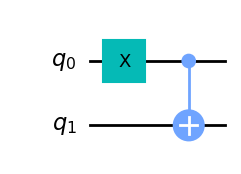

In [ ]:
circ = QuantumCircuit(2)
circ.x(0)
circ.cx(0, 1)
circ.draw('mpl')

In [ ]:
Operator(circ)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [ ]:
circ = generate_random_circuit(100, 100)

In [ ]:
from Extra_Code.CollectNqBlocks import CollectNqBlocks
start = time.time()
x = CollectNqBlocks(circuit_to_dag(circ), 10)
display(time.time() - start)

0.04085707664489746

In [ ]:
len(x)

158

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


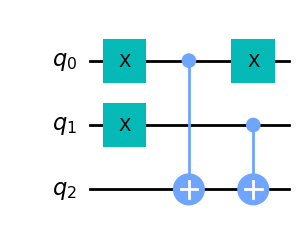

In [ ]:
load_templates()[0][0].draw('mpl')

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


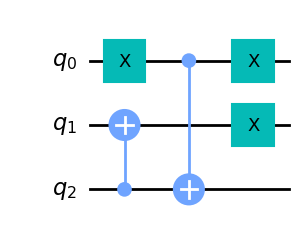

In [ ]:
qreg_q = QuantumRegister(3, 'q')

circuit = QuantumCircuit(qreg_q)

circuit.x(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])


circuit.draw('mpl')

ValueError: Could not save to JPEG for display

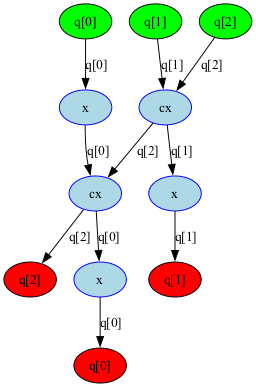

In [ ]:
from qiskit.visualization import dag_drawer

# Ignore the errors, it will at least print out the dag
dag_drawer(circuit_to_dag(circuit))

## Looking at circuit matrices, example for thesis doc

In [ ]:
import numpy as np

# Identity (I) gate
I = np.eye(2)

# Pauli-X (X) gate
X = np.array([[0, 1],
                   [1, 0]])

# Controlled-X (CX) gate
CX = np.array([[1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, 0, 1],
                    [0, 0, 1, 0]])

np.kron(X, CX)

array([[0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

In [ ]:
l1 = np.array([
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0]
])

l2 = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0]
])

l3 = np.array([
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0]
])

# l3l2l1
# l1l3l2
# l2l1l3

In [ ]:
np.matmul(np.matmul(l2, l3), l1)

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0]])

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


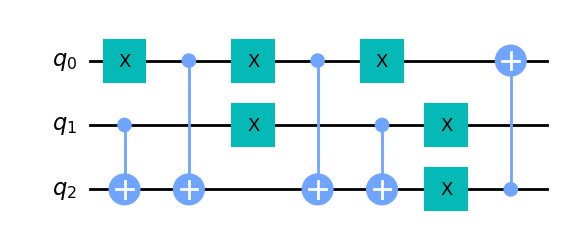

In [ ]:
circuit.draw('mpl')

## Identity template application example

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


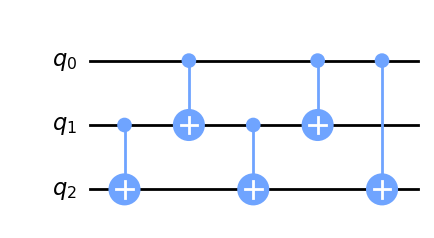

In [28]:
# Identity template example

circ = QuantumCircuit(3)
circ.cx(1, 2)
circ.cx(0, 1)
circ.cx(1, 2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.draw('mpl')

/Users/christiangrauberger/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


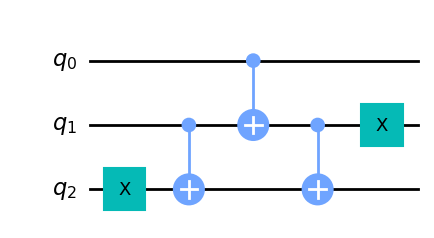

In [ ]:
circ = QuantumCircuit(3)
circ.x(2)
circ.cx(1, 2)
circ.cx(0, 1)
circ.cx(1, 2)
circ.x(1)
circ.draw('mpl')

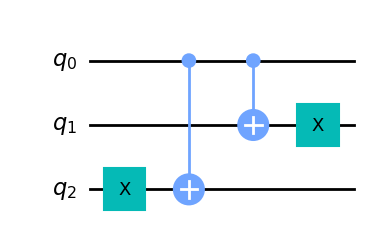

In [ ]:
circ = QuantumCircuit(3)
circ.x(2)
circ.cx(0, 2)
circ.cx(0, 1)
circ.x(1)
circ.draw('mpl')